# plot 2D beam distribution

In [34]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [35]:
# this file is created in TempPhysicalModels.py
filein="beam_profile.txt"

# bin surface [m2] = WIRESCAN_wRes*WIRESCAN_wWidth:
sbin=30e-6*2e-4
dt=0.471e-6

In [36]:
cstepn=0
cbinn=0
cflux=0.0
totsum=0.0
x=[]
xt=[]
y=[]
Z=[]
Zt=[]
cfluxr=0
with open(filein,'r') as fin:
    for idx,line in enumerate(fin):
        #print(idx,line)
        if 'simstep' in line:
            cstepn=int(line.split()[1])
            #print(line.split()[1])
        else:
            #if idx==9:
            #    print(line.strip().split(','))
            cbinn=int(line.strip().split(',')[1])
            cflux=float(line.strip().split(',')[2])
            if cflux>0.1:
                print(cstepn,cflux)
            cfluxr+=cflux
            x.append(cstepn)
            y.append(cbinn)
            Z.append(cflux)
            if cbinn==8:
                xt.append(cstepn)
                Zt.append(cfluxr)
                cfluxr=0
        totsum+=cflux

1416 0.10067739679136754
1416 0.10067739679136754
1417 0.10139234166774451
1417 0.10139234166774451
1418 0.10211225499611858
1418 0.10211225499611858
1419 0.10283717051686252
1419 0.10283717051686252
1420 0.10356712219387758
1420 0.10356712219387758
1421 0.10430214421603529
1421 0.10430214421603529
1422 0.10504227099862849
1422 0.10504227099862849
1423 0.10578753718483122
1423 0.10578753718483122
1424 0.10653797764716796
1424 0.10653797764716796
1425 0.10729362748899157
1425 0.10729362748899157
1426 0.10805452204597131
1426 0.10805452204597131
1427 0.10882069688758939
1427 0.10882069688758939
1428 0.10959218781864784
1428 0.10959218781864784
1429 0.1103690308807829
1429 0.1103690308807829
1430 0.11115126235399216
1430 0.11115126235399216
1431 0.11193891875816686
1431 0.11193891875816686
1432 0.11273203685463834
1432 0.11273203685463834
1433 0.11353065364773059
1433 0.11353065364773059
1434 0.11433480638632505
1434 0.11433480638632505
1435 0.10036891095765717
1435 0.11514453256543247
14

10964 8564758.122900257
10965 4929329.254082131
10965 8538419.043043248
10965 12891845.4222342
10965 16966983.407679223
10965 19464746.153785266
10965 19464746.153785266
10965 16966983.407679223
10965 12891845.42223421
10965 8538419.04304325
10966 4914164.930118391
10966 8512151.908949977
10966 12852185.640873218
10966 16914787.09052951
10966 19404865.853376538
10966 19404865.853376538
10966 16914787.09052951
10966 12852185.640873222
10966 8512151.908949979
10967 4899042.045720853
10967 8485956.555085402
10967 12812634.237844106
10967 16862733.410317983
10967 19345149.18793623
10967 19345149.18793623
10967 16862733.410317983
10967 12812634.237844113
10967 8485956.555085406
10968 4883960.505486216
10968 8459832.816195121
10968 12773190.96363532
10968 16810822.038662
10968 19285595.78073946
10968 19285595.78073946
10968 16810822.038662
10968 12773190.963635324
10968 8459832.816195125
10969 4868920.214173091
10969 8433780.5273052
10969 12733855.56915876
10969 16759052.64773623
10969 19226

In [38]:
print(y[1])
print(sum(Zt),len(Zt))
print('10^13*',totsum/1e13)

0
0 0
2.717609626791749


In [33]:
# theory
Npcirc = 2.16e13
frev = 43478.26  # [Hz]
dw=30e-6         # [m] 
vw=1.0            # [m/s]

print('10^13*',Npcirc*frev*dw/vw/1e13)


10^13* 2.817391248


<IPython.core.display.Javascript object>


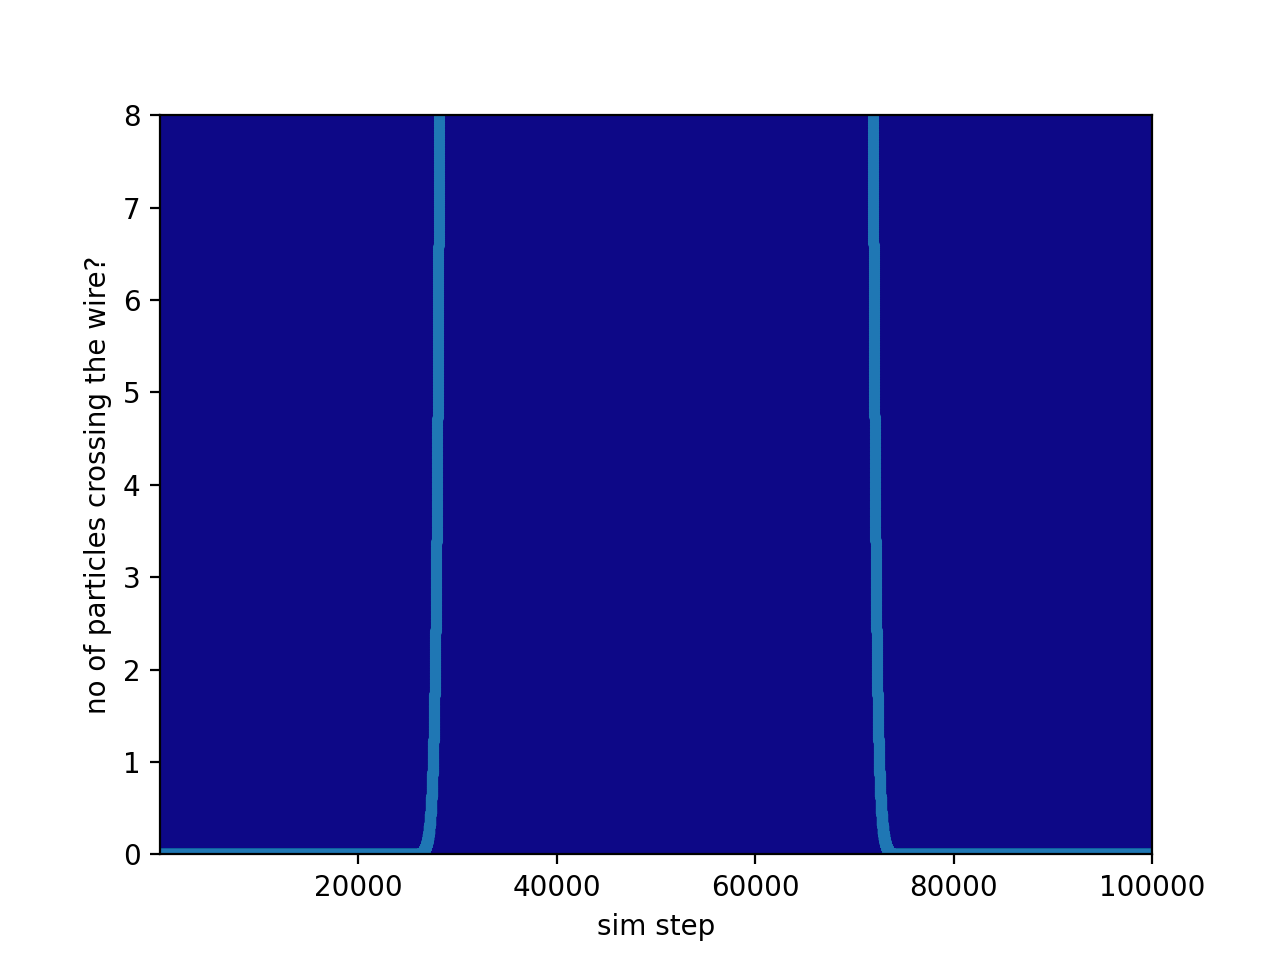

In [5]:
plt.plot(xt,Zt,'.')
plt.xlabel("sim step")
plt.ylabel("no of particles crossing the wire?")
plt.savefig("beamp.png")

In [12]:
print(len(x))
print(len(y))
print(len(Z))
print("totsum= ",totsum/1e13)

print(totsum*0.01*0.24) # for PSI MBPTWS


4500000
4500000
4500000
6.894781811702636e-05
1654747.6348086323


In [7]:
#plt.contourf(np.array(x),y,Z,100)
#plt.pcolormesh(x,y,Z)
plt.hist2d(x,y,bins=1000,weights=Z, cmap="plasma")

(array([[1.43226770e+11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.58371058e-65],
        [2.64552701e+11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 3.34479926e-65],
        [4.84904129e+11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 7.05364526e-65],
        ...,
        [6.66399758e-66, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 7.10641825e-65],
        [3.16007785e-66, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 3.36987440e-65],
        [1.49627027e-66, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.59560717e-65]]),
 array([1.0000000e+00, 1.0099900e+02, 2.0099800e+02, ..., 9.9800002e+04,
        9.9900001e+04, 1.0000000e+05]),
 array([0.   , 0.008, 0.016, ..., 7.984, 7.992, 8.   ]),
 <matplotlib.collections.QuadMesh at 0x117566c90>)